In [1]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from torchvision.transforms import RandomAffine, Normalize, ToTensor, ToPILImage, Resize, InterpolationMode
import torch
import numpy as np

In [2]:
img = cv2.cvtColor(cv2.imread('img_dyna/dynamite.png'), cv2.COLOR_BGR2RGB)

(500, 500, 3)

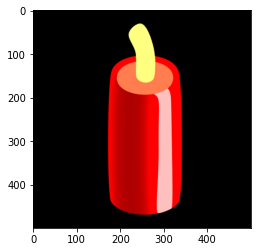

In [3]:
plt.imshow(img)
img.shape

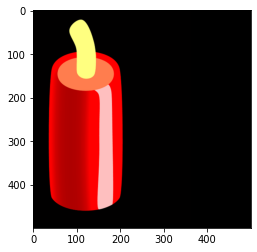

In [4]:
# horizontal and vertical shift
tensor_img = torch.from_numpy(np.transpose(img, (2, 0, 1)))
plt.imshow(np.transpose(RandomAffine(0, (.34, .07))(tensor_img).numpy(), (1,2,0)))

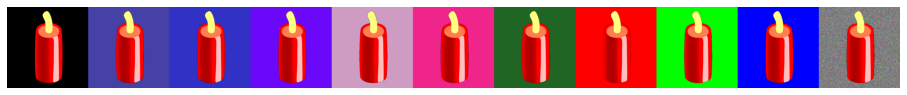

In [5]:
# background augmentation
bgs = [
  *[np.random.randint(0, 255, 3) for i in range(6)],
  [255,0,0], [0,255,0], [0,0,255], None
]
I = [img.copy()]
for bg in bgs:
  imgcp = img.copy()
  for px in range(500):
    for py in range(500):
      rgb = imgcp[px][py]
      if sum(rgb) <= 1:
        if bg is None:
          imgcp[px][py] = np.random.randint(0, 255, 3)
        else:
          imgcp[px][py] = bg
  I.append(imgcp)
plt.figure(figsize=(16,16))
plt.axis('off')
plt.imshow(np.concatenate(I, axis=1))

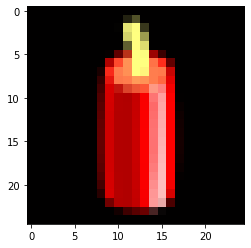

In [6]:
plt.imshow(cv2.resize(img, dsize=(25,25), interpolation=cv2.INTER_AREA))
Resize((25,25))(ToPILImage()(img))

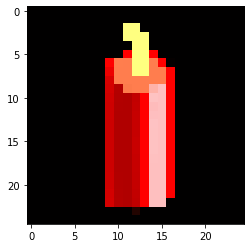

In [7]:
plt.imshow(np.transpose(Resize(size=(25,25))(tensor_img).numpy(), (1,2,0)))

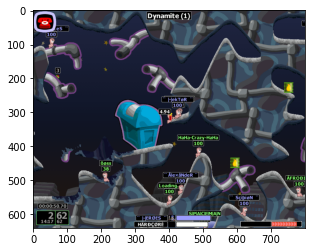

In [8]:
imgu = cv2.cvtColor(cv2.imread('img_dyna/dynau1.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu)

(25, 25, 3)

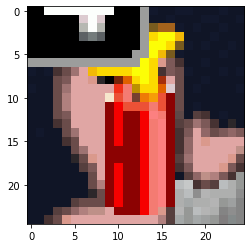

In [9]:
shrink = 300
n = imgu[shrink:-shrink-15,392:-383,:]
plt.imshow(n)
cv2.imwrite("/Users/lair/fun/waai/img_dyna/dynau1crop.png", cv2.cvtColor(n, cv2.COLOR_BGR2RGB))
n.shape

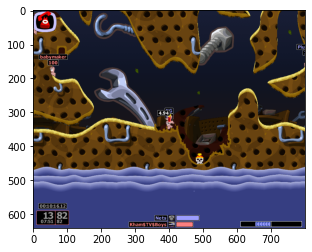

In [10]:
imgu2 = cv2.cvtColor(cv2.imread('img_dyna/dynau2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(imgu2)

(25, 25, 3)

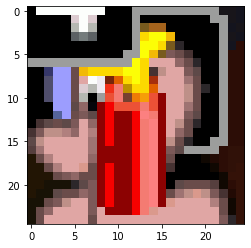

In [11]:
shrink = 300
n2 = imgu2[shrink+4:-shrink-11,390:-385,:]
plt.imshow(n2)
cv2.imwrite("/Users/lair/fun/waai/img_dyna/dynau2crop.png", cv2.cvtColor(n2, cv2.COLOR_BGR2RGB))
n2.shape

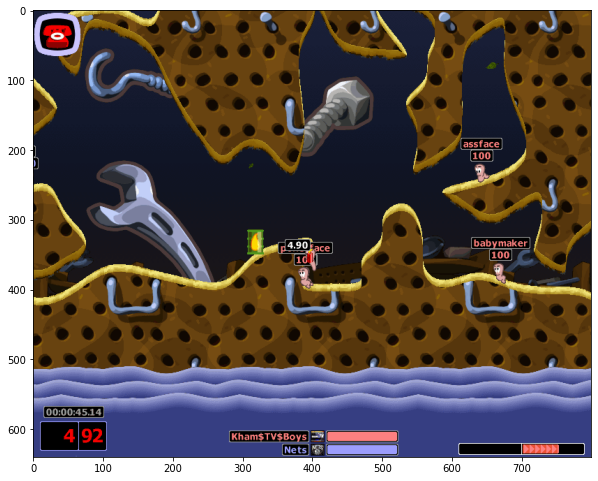

(640, 800, 3)

In [12]:
imgneg = cv2.cvtColor(cv2.imread('negative.png'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(imgneg)
plt.show()
imgneg.shape

In [13]:
kernel = 25
stride = 30
I = []
for xi in range(0, len(imgneg), stride):
  for yi in range(0, len(imgneg[xi]), stride):
    # TODO crop the image so that the padding won't be required
    padd = np.zeros((kernel,kernel,3), np.uint8)
    targ = imgneg[xi:xi+kernel,yi:yi+kernel,:]
    s = targ.shape
    padd[:s[0], :s[1], :] = targ
    I.append(padd)

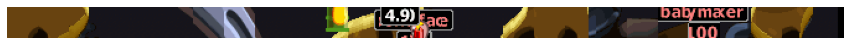

In [14]:
plt.figure(figsize=(15,15))
plt.axis('off')
row = 11
plt.imshow(np.concatenate(I[27*row:27*row+27], axis=1))
plt.show()

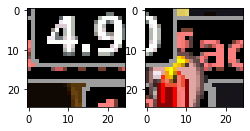

In [15]:
plt.subplot(131)
plt.imshow(I[297+12])
plt.subplot(132)
plt.imshow(I[297+13])
# these are the closes to dynamite but i'd still count them as negative

In [19]:
for i in range(len(I)):
  cv2.imwrite(f"/Users/lair/fun/waai/negs/{i}.png", cv2.cvtColor(I[i], cv2.COLOR_BGR2RGB))